In [1]:
#imports
import pandas as pd
import numpy as np
from PIL import Image
np.set_printoptions(linewidth=155)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#loading the  the datasets
input_file = "/content/drive/MyDrive/CMPE-255-Project/train.csv" 
Handwrittendata = pd.read_csv(input_file, header=None)

train = pd.read_csv("/content/drive/MyDrive/CMPE-255-Project/train_stratified.csv", header=None, na_values="?")

test = pd.read_csv("/content/drive/MyDrive/CMPE-255-Project/test_stratified.csv", header=None, na_values="?")

# train = pd.read_csv("/content/drive/MyDrive/CMPE-255-Project/train.csv", header=None, na_values="?")

# test = pd.read_csv("/content/drive/MyDrive/CMPE-255-Project/test.csv", header=None, na_values="?")




In [4]:
Handwrittendata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297961 entries, 0 to 297960
Columns: 785 entries, 0 to 784
dtypes: float64(734), int64(51)
memory usage: 1.7 GB


In [5]:
Handwrittendata.iloc[:,0].value_counts()

14    46266
18    38778
20    23198
2     18705
19    18003
15    15577
13    15156
0     11075
12     9835
11     9301
4      9234
17     9196
24     8665
22     8657
3      8058
1      6968
9      6817
7      5721
23     5028
25     4855
6      4658
16     4602
10     4460
21     3311
5       937
8       900
Name: 0, dtype: int64

In [6]:
row1 = Handwrittendata.iloc[2234,:].values

row1 = row1[0:8381]

print(row1)
print(type(row1))
print(row1.shape)

[ 13.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0

In [7]:
mat1 = np.resize(row1,(28,28))

In [8]:
print(mat1)

[[ 13.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]

In [9]:
im = Image.fromarray(mat1.astype(np.uint8))

In [10]:
im

In [11]:
#Load other modules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score

In [12]:
#Seperate the target and independant variables
df_x=train.iloc[:,1:]
df_y=train.iloc[:,0]

In [13]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

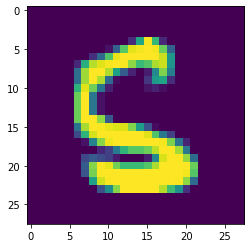

In [14]:
print_image(1, df_x)

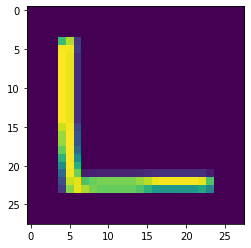

In [22]:
print_image(2, df_x)

In [15]:
#Check the frequency of each number
df_y.value_counts().sort_index()

0     11096
1      6934
2     18727
3      8107
4      9152
5       930
6      4610
7      5774
8       896
9      6794
10     4482
11     9269
12     9869
13    15208
14    46260
15    15473
16     4650
17     9253
18    38735
19    17996
20    23207
21     3346
22     8627
23     5018
24     8687
25     4861
Name: 0, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


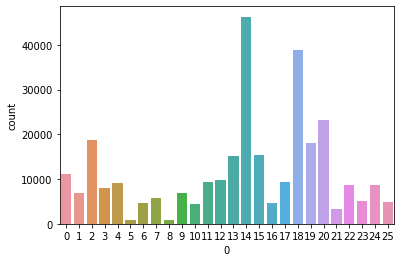

In [16]:
sns.countplot(df_y)

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
len(X_train)
len(X_test)

(208572, 784)
(89389, 784)


89389

In [20]:
#training random Forest
#removed y_train bcz we dont need label
#iloc[:,1:] taking all the rows expect the label colum 
#X_train.iloc[:,0] contains only label colum 
rf= RandomForestClassifier(n_estimators=50)
rf.fit(df_x,df_y)
test_df_x = test.iloc[:,1:]
test_df_y = test.iloc[:,0]
print("RandomForest Score for n_estimators=50")
rf.score(test_df_x,test_df_y)


RandomForest Score for n_estimators=50


0.9873541770146729

In [21]:
rf=RandomForestClassifier(n_estimators=110)
rf.fit(df_x,df_y)
print("RandomForest Score for n_estimators=110")
rf.score(test_df_x,test_df_y)


RandomForest Score for n_estimators=110


0.9878374568739848

In [ ]:
# rf=RandomForestClassifier(n_estimators=120)
# rf.fit(df_x,df_y)
# print("RandomForest Score for n_estimators=120")
# rf.score(test_df_x,test_df_y)

In [24]:
pred= rf.predict(test.iloc[:,1:])

In [25]:
alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

print(classification_report(test_df_y, pred, target_names=alphabet))


              precision    recall  f1-score   support

           A       0.97      0.99      0.98      2775
           B       0.99      0.97      0.98      1734
           C       0.99      0.99      0.99      4682
           D       0.98      0.98      0.98      2027
           E       0.99      0.99      0.99      2288
           F       1.00      0.90      0.95       233
           G       0.99      0.96      0.97      1152
           H       0.98      0.95      0.97      1444
           I       1.00      0.97      0.99       224
           J       0.98      0.97      0.97      1699
           K       0.98      0.97      0.97      1121
           L       0.99      0.99      0.99      2317
           M       0.99      0.97      0.98      2467
           N       0.98      0.99      0.98      3802
           O       0.99      1.00      0.99     11565
           P       0.98      0.99      0.99      3868
           Q       0.99      0.94      0.96      1162
           R       0.98    

In [26]:
print ("Confusion Report")
cm = test_df_y, pred
print(confusion_matrix(test_df_y, pred))

Confusion Report
[[ 2757     0     0     2     1     0     2     1     0     0     1     1     2     0     0     5     0     3     0     0     0     0     0     0     0
      0]
 [    4  1690     1     6     0     0     1     0     0     0     0     0     1     0    15     1     0     5    10     0     0     0     0     0     0
      0]
 [    0     0  4656     0     2     0     0     0     0     0     0     7     2     0    11     2     0     0     0     2     0     0     0     0     0
      0]
 [    1     0     0  1982     0     0     0     0     0     0     0     0     1     0    37     2     1     0     2     0     1     0     0     0     0
      0]
 [    2     3    13     1  2255     0     2     0     0     0     2     3     0     0     0     2     0     2     1     0     0     0     0     0     0
      2]
 [    1     0     0     0     2   210     1     0     0     0     0     0     0     0     0    15     0     1     0     2     0     0     1     0     0
      0]
 [    1     4    

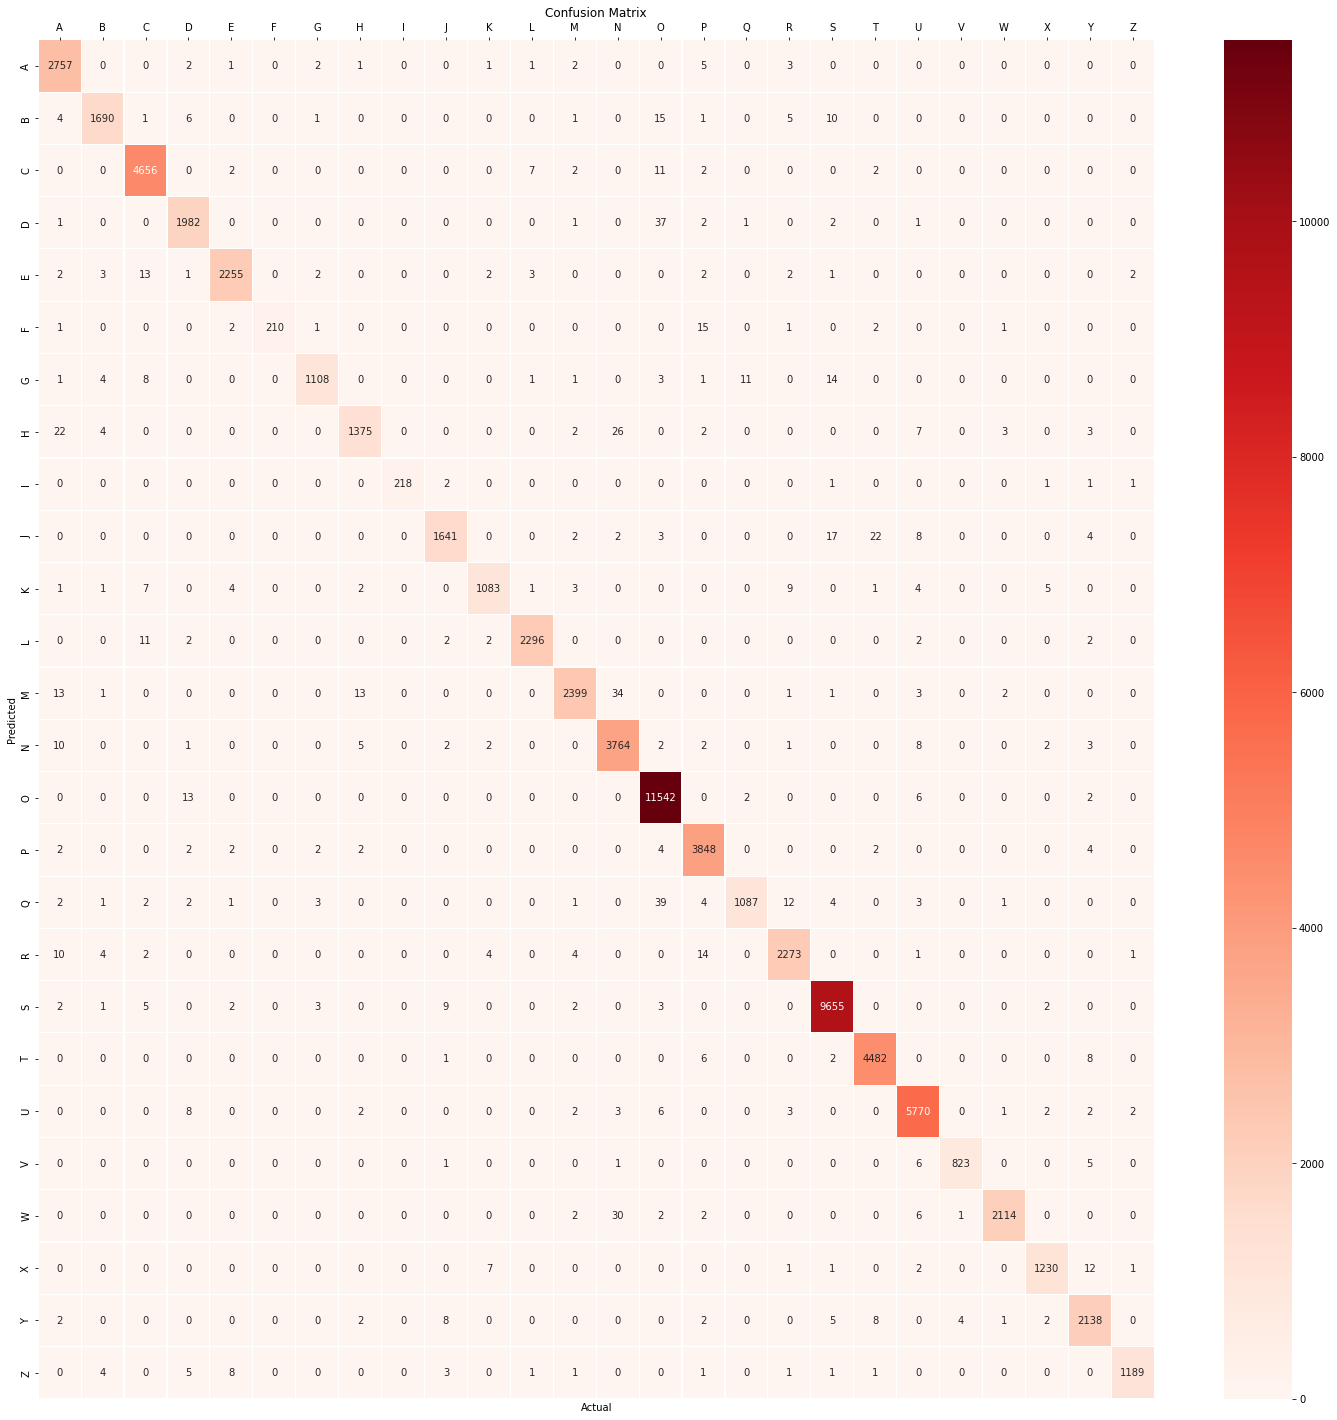

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import rcParams

alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y','Z']
cm= confusion_matrix(y_true=test_df_y, y_pred=pred)
s = sns.heatmap(cm, xticklabels=alphabets,yticklabels=alphabets, annot=True,fmt='g', cmap='Reds', linewidth=0.10)
s.set(title='Confusion Matrix')
s.xaxis.tick_top()
s.set_xlabel('Actual')
s.set_ylabel('Predicted')

rcParams['figure.figsize']=30,30

#References
https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/
https://builtin.com/data-science/random-forest-python